IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

DATA VISUALIZATION

In [2]:

df = pd.read_csv('Final Dataset.csv')

In [3]:
df.head()

,Datetime,BESCOM
0,01-01-2018 00:00,211786.8638
1,01-01-2018 01:00,204022.4531
2,01-01-2018 02:00,198376.1782
3,01-01-2018 03:00,198870.6240
4,01-01-2018 04:00,201310.4045


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  17520 non-null  object 
 1   BESCOM    17520 non-null  float64
dtypes: float64(1), object(1)
memory usage: 273.9+ KB


In [5]:
#Sum power consumption by hr to consumption by day
df['Datetime'] = pd.to_datetime(df['Datetime'])
df=df.set_index('Datetime')
df_daily=df.resample('D').sum()

In [6]:
df.isnull().sum()

BESCOM    0
dtype: int64

In [7]:
df_daily

,BESCOM
Datetime,
2018-01-01,5.465430e+06
2018-01-02,5.785545e+06
2018-01-03,5.898176e+06
2018-01-04,5.992804e+06
2018-01-05,6.069460e+06
...,...
2019-12-27,6.099080e+06
2019-12-28,5.907196e+06
2019-12-29,5.361519e+06


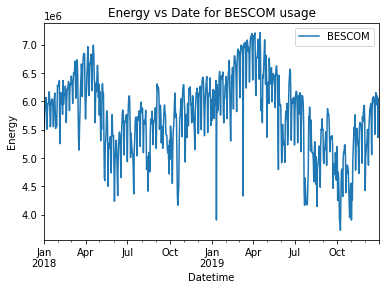

In [8]:
df_daily.plot(kind="line")
plt.ylabel('Energy')
plt.title('Energy vs Date for BESCOM usage')
plt.show()

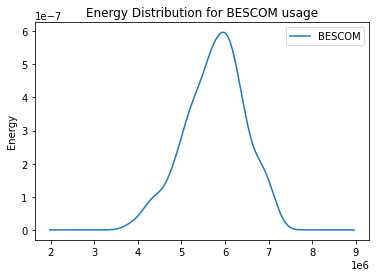

In [9]:
df_daily.plot(kind="kde")
plt.ylabel('Energy')
plt.title('Energy Distribution for BESCOM usage')
plt.show()

DECOMPOSING THE TIME SERIES INTO COMPONENTS

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
decompTurnover = sm.tsa.seasonal_decompose(df_daily.BESCOM, model="additive", freq=12)


<Figure size 432x288 with 0 Axes>

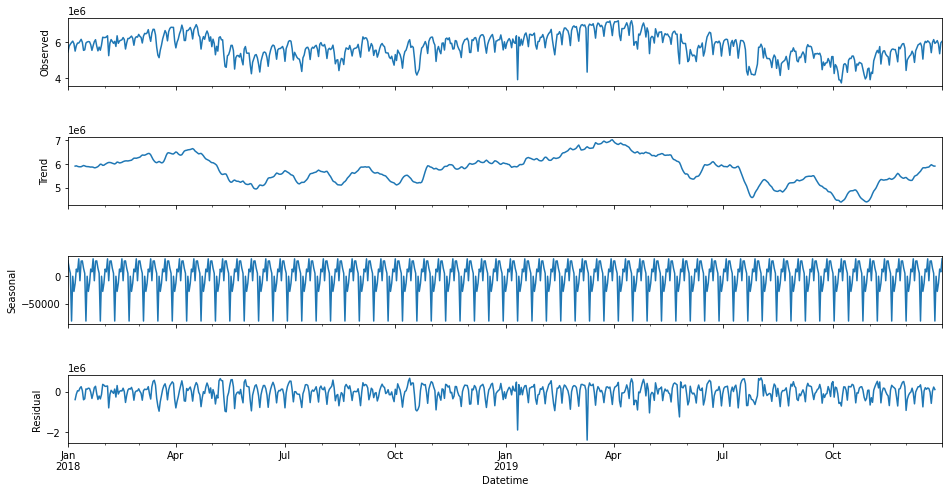

In [12]:
fig = plt.figure()  
fig = decompTurnover.plot()  
fig.set_size_inches(15, 8)

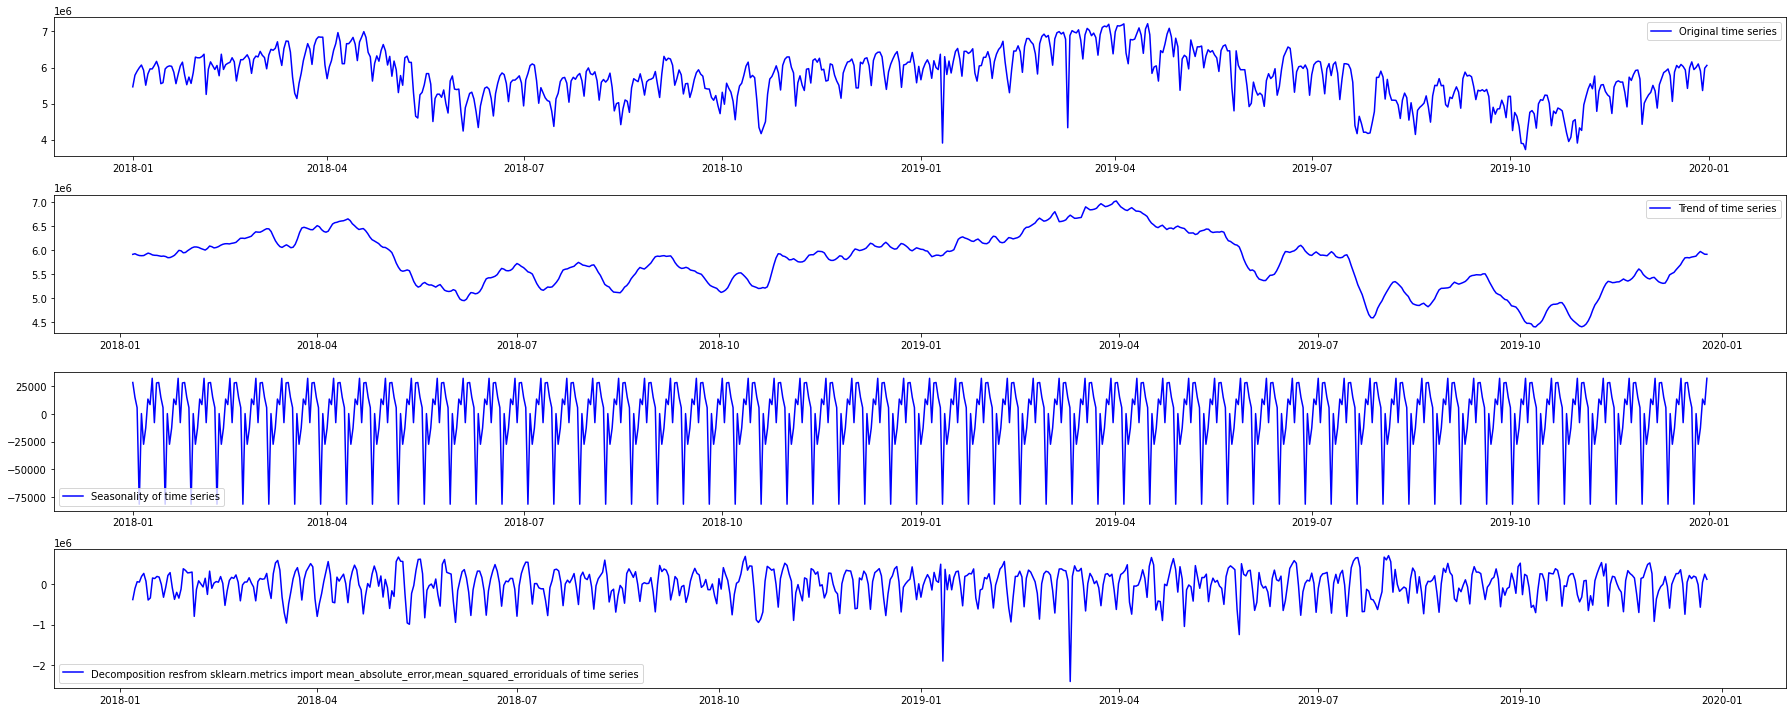

In [13]:
results = decompTurnover
trend_estimate    = results.trend
periodic_estimate = results.seasonal
residual = results.resid
 
plt.figure(figsize=(25,10))
plt.subplot(411)
plt.plot(df_daily,label='Original time series', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_estimate,label='Trend of time series',color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(periodic_estimate,label='Seasonality of time series',color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Decomposition resfrom sklearn.metrics import mean_absolute_error,mean_squared_erroriduals of time series',color='blue')
plt.legend(loc='best')
plt.tight_layout()

MODEL

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
# Split into train and test set
train_data = df_daily[:584] 
test_data = df_daily[584:] 

In [16]:
fitted_model = ExponentialSmoothing(train_data['BESCOM'],seasonal='add',seasonal_periods=365).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [17]:
test_predictions = fitted_model.forecast(146).rename('BESCOM Test Forecast')

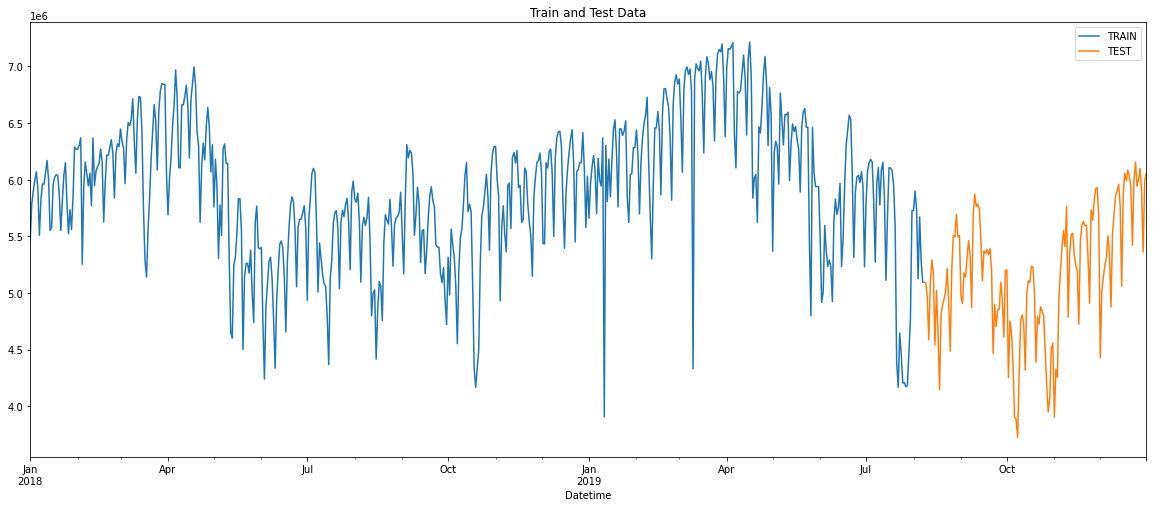

In [18]:
train_data['BESCOM'].plot(legend=True,label='TRAIN')
test_data['BESCOM'].plot(legend=True,label='TEST',figsize=(20,8))
plt.title('Train and Test Data');

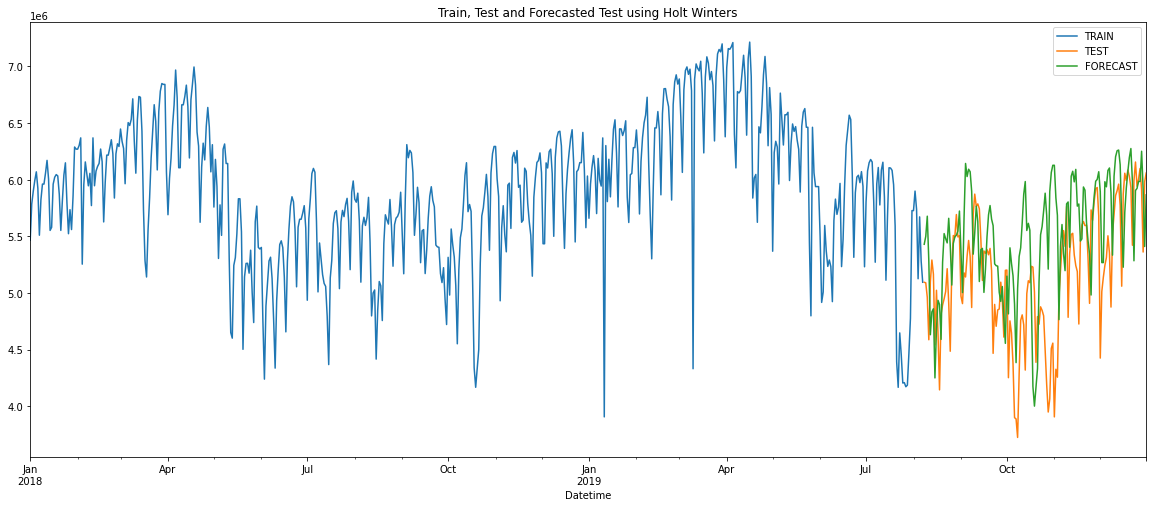

In [19]:
train_data['BESCOM'].plot(legend=True,label='TRAIN')
test_data['BESCOM'].plot(legend=True,label='TEST',figsize=(20,8))
test_predictions.plot(legend=True,label='FORECAST')
plt.title('Train, Test and Forecasted Test using Holt Winters');

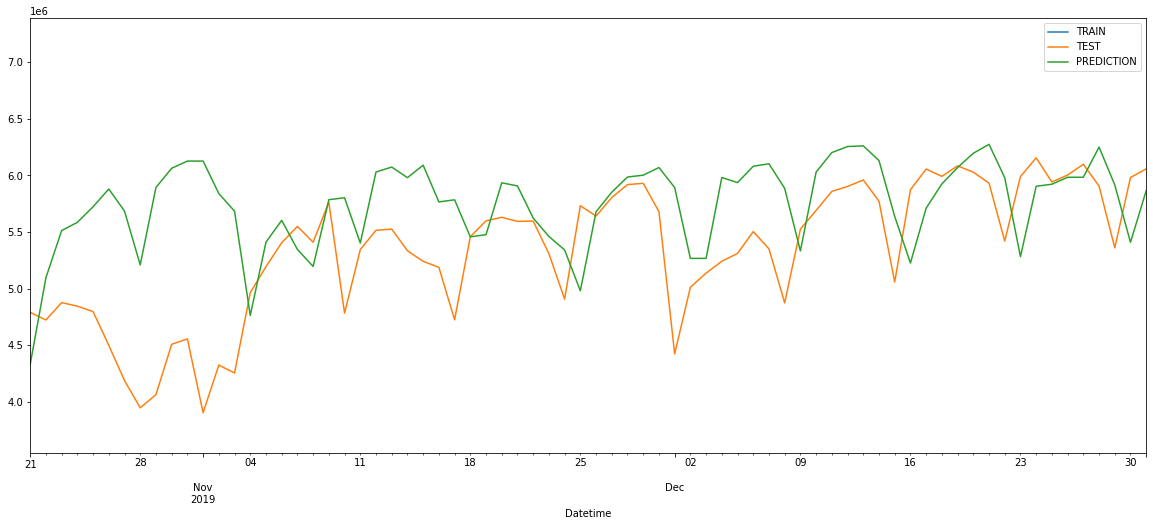

In [20]:
train_data['BESCOM'].plot(legend=True,label='TRAIN')
test_data['BESCOM'].plot(legend=True,label='TEST',figsize=(20,8), xlim=['2019-10-21','2019-12-31'])
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2019-10-21','2019-12-31']);

EVALUATING MODEL

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
print(f'Mean Absolute Error = {mean_absolute_error(test_data,test_predictions)}')

Mean Absolute Error = 519988.4358888259


In [23]:
print(f'Mean Squared Error = {mean_squared_error(test_data,test_predictions)}')

Mean Squared Error = 451821123233.2185


In [24]:
df_daily['BESCOM'].describe()

count    7.300000e+02
mean     5.765790e+06
std      6.817786e+05
min      3.724765e+06
25%      5.312767e+06
50%      5.819004e+06
75%      6.229707e+06
max      7.214807e+06
Name: BESCOM, dtype: float64

In [25]:
##relative error
def mean_absolute_percentage_error(y_test,y_pred):
    return np.mean(np.abs(((y_test-y_pred)/y_test)))*100

In [26]:
print(mean_absolute_percentage_error(test_predictions.values,test_data.values))

11.787355538737089


In [27]:
forecast_errors = [test_data.values[i]-test_predictions.values[i] for i in range(len(test_data))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [array([-335591.39782169]), array([-409328.07572169]), array([-716267.76742169]), array([-696457.56472207]), array([466821.74097793]), array([458000.64877793]), array([306079.00937793]), array([291651.88757793]), array([341780.11147793]), array([-287410.53532207]), array([-753333.43372207]), array([222170.02687793]), array([-376821.02792207]), array([-575941.77292207]), array([-467117.39122207]), array([-228056.58152207]), array([-749952.62332207]), array([-932715.24452207]), array([143922.41777793]), array([69957.77017793]), array([-0.37162207]), array([181997.86147793]), array([-52030.77782207]), array([-217492.44522207]), array([-386910.00442207]), array([-97139.77292207]), array([-479666.02352207]), array([-1002211.71922207]), array([-704461.27852207]), array([-628703.13782207]), array([-749248.08202207]), array([-1025031.16882207]), array([348223.31037793]), array([341612.78777793]), array([-2641.76782207]), array([155706.01557793]), array([642187.15967793]), arra

In [28]:
test_predictions

2019-08-08    5.429869e+06
2019-08-09    5.499011e+06
2019-08-10    5.677868e+06
2019-08-11    5.283514e+06
2019-08-12    4.631500e+06
                  ...     
2019-12-27    5.984479e+06
2019-12-28    6.251163e+06
2019-12-29    5.916820e+06
2019-12-30    5.410187e+06
2019-12-31    5.866169e+06
Freq: D, Name: BESCOM Test Forecast, Length: 146, dtype: float64

In [29]:
test_data

,BESCOM
Datetime,
2019-08-08,5.094278e+06
2019-08-09,5.089683e+06
2019-08-10,4.961600e+06
2019-08-11,4.587056e+06
2019-08-12,5.098322e+06
...,...
2019-12-27,6.099080e+06
2019-12-28,5.907196e+06
2019-12-29,5.361519e+06


FINAL MODEL

In [30]:
final_model = ExponentialSmoothing(df_daily['BESCOM'],seasonal='add',seasonal_periods=365).fit()

In [31]:
forecast_predictions = final_model.forecast(steps=180)

In [32]:
forecast_predictions.head()

2020-01-01    5.434475e+06
2020-01-02    5.754292e+06
2020-01-03    5.866920e+06
2020-01-04    5.961453e+06
2020-01-05    6.034871e+06
Freq: D, dtype: float64

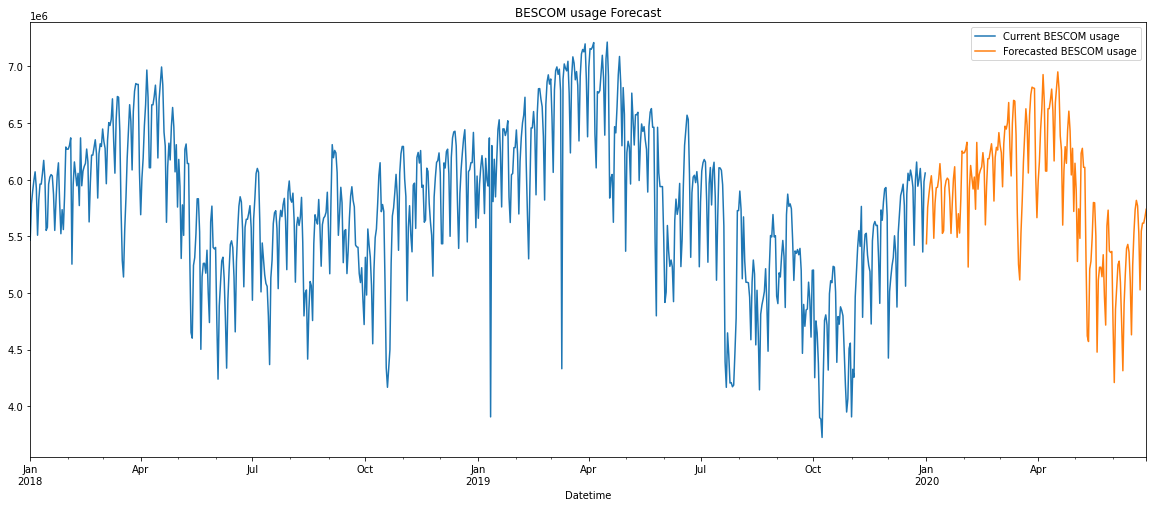

In [33]:
df_daily['BESCOM'].plot(figsize=(20,8),legend=True,label='Current BESCOM usage')
forecast_predictions.plot(legend=True,label='Forecasted BESCOM usage')
plt.title('BESCOM usage Forecast');

In [34]:
forecast = pd.Series(forecast_predictions).to_frame('BESCOM')

In [35]:
forecast

,BESCOM
2020-01-01,5.434475e+06
2020-01-02,5.754292e+06
2020-01-03,5.866920e+06
2020-01-04,5.961453e+06
2020-01-05,6.034871e+06
...,...
2020-06-24,5.546357e+06
2020-06-25,5.616572e+06
2020-06-26,5.616476e+06
2020-06-27,5.670392e+06


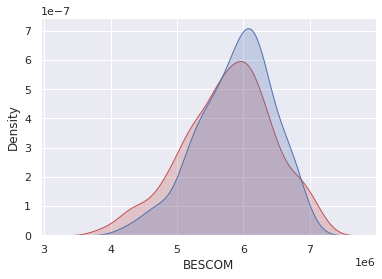

In [36]:
# Plotting the KDE Plot
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(df_daily['BESCOM'], shade=True, color="r")
fig = sns.kdeplot(forecast['BESCOM'], shade=True, color="b")
plt.show()

In [37]:
forecast_predictions

2020-01-01    5.434475e+06
2020-01-02    5.754292e+06
2020-01-03    5.866920e+06
2020-01-04    5.961453e+06
2020-01-05    6.034871e+06
                  ...     
2020-06-24    5.546357e+06
2020-06-25    5.616572e+06
2020-06-26    5.616476e+06
2020-06-27    5.670392e+06
2020-06-28    5.738615e+06
Freq: D, Length: 180, dtype: float64